# Machine learning Project on prediction of used car price

#### Name:-shubham singh rana
#### RollNo:-101703535
#### COE 24

In [1]:
#importing libraries and reading data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('usedcar.csv')
df


1


In [2]:
print(df.isnull().sum())

Distance(km)             0
Fuel Type                0
Location              7490
Manufacturing Year       0
Price in INR             0
Make                     0
Model                   18
dtype: int64


In [3]:
print(df.isnull().sum(axis=1)>=1)

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14        True
15        True
16        True
17       False
18       False
19        True
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
17250    False
17251    False
17252    False
17253     True
17254     True
17255     True
17256    False
17257    False
17258    False
17259     True
17260    False
17261    False
17262    False
17263    False
17264    False
17265    False
17266    False
17267    False
17268    False
17269     True
17270     True
17271    False
17272    False
17273    False
17274    False
17275     True
17276    False
17277    False
17278    False
17279    False
dtype: bool


In [4]:
#finding percentage of null values or missing values
print(round(100*(df.isnull().sum().sort_values(ascending=False)/len(df.index)),2))

Location              43.34
Model                  0.10
Make                   0.00
Price in INR           0.00
Manufacturing Year     0.00
Fuel Type              0.00
Distance(km)           0.00
dtype: float64


In [5]:
#dropping location because to many missing values and not of use
df=df.drop(['Location'],axis='columns')

In [6]:
df=df[df.isnull().sum(axis=1) <1]
df

,Distance(km),Fuel Type,Manufacturing Year,Price in INR,Make,Model
0,48200.0,Diesel,2016.0,3200000.0,Audi,Q3 35 TDI Technology
1,55310.0,Diesel,2013.0,245000.0,Audi,Q3 2.0 TDI quattro
2,30120.0,Diesel,2013.0,255000.0,Audi,Q3 2.0 TDI quattro
3,98000.0,Diesel,2011.0,249900.0,Audi,A8 L- 2013 3.0 TDI quattro
4,42000.0,Diesel,2009.0,220000.0,Audi,A8 (2003 - 2010) 3.0 TDi
5,41000.0,Diesel,2009.0,265000.0,Audi,A8 (2003 - 2010) 3.0 TDi
6,16000.0,Diesel,2014.0,215000.0,Audi,Q3 [2012-2015] 2.0 TDI quattro Premium Plus
7,69000.0,Diesel,2011.0,280000.0,Audi,A7 Sportback 3.0 TDI quattro
8,24510.0,Diesel,2014.0,286500.0,Audi,A6 2011-2015 3.0 TDI quattro
9,56500.0,Diesel,2013.0,198000.0,Audi,A6 2011-2015 2.0 TDI


In [7]:
print(round(100*(df.isnull().sum().sort_values(ascending=False)/len(df.index)),2))

Model                 0.0
Make                  0.0
Price in INR          0.0
Manufacturing Year    0.0
Fuel Type             0.0
Distance(km)          0.0
dtype: float64


In [9]:
df.shape[0]


17262

# Data cleaned Now using Model to predict prices


In [10]:
df.groupby("Fuel Type").Make.count()

Fuel Type
CNG               204
Diesel            606
Electric            1
LPG               165
Petrol            436
diesel           1313
petrol           4765
                   28
  CNG              82
  CNGPetrol         6
  Diesel         3483
  Hybrid            1
  LPG              85
  Petrol         6087
Name: Make, dtype: int64

In [11]:
#petrol dies

df.iloc[:,1].unique()

array(['Diesel', '\xa0 Diesel \xa0', '\xa0 Petrol \xa0', '\xa0 CNG \xa0',
       'LPG', '\xa0  \xa0', '\xa0 LPG \xa0', 'Petrol', 'CNG',
       '\xa0 CNGPetrol \xa0', 'diesel', 'petrol', '\xa0 Hybrid \xa0',
       'Electric'], dtype=object)

In [12]:
df.groupby("Fuel Type").Make.count().sort_values(ascending=False)

Fuel Type
  Petrol         6087
petrol           4765
  Diesel         3483
diesel           1313
Diesel            606
Petrol            436
CNG               204
LPG               165
  LPG              85
  CNG              82
                   28
  CNGPetrol         6
  Hybrid            1
Electric            1
Name: Make, dtype: int64

In [13]:
data=df[(df['Fuel Type']!='\xa0  \xa0') & (df['Fuel Type']!='\xa0 Hybrid \xa0') & (df['Fuel Type']!='\xa0 CNGPetrol \xa0')&(df['Fuel Type']!='Electric')]
data.groupby('Fuel Type').count()

,Distance(km),Manufacturing Year,Price in INR,Make,Model
Fuel Type,,,,,
CNG,204,204,204,204,204
Diesel,606,606,606,606,606
LPG,165,165,165,165,165
Petrol,436,436,436,436,436
diesel,1313,1313,1313,1313,1313
petrol,4765,4765,4765,4765,4765
CNG,82,82,82,82,82
Diesel,3483,3483,3483,3483,3483
LPG,85,85,85,85,85


In [14]:
data.groupby("Fuel Type").Make.count().sort_values(ascending=False)

Fuel Type
  Petrol      6087
petrol        4765
  Diesel      3483
diesel        1313
Diesel         606
Petrol         436
CNG            204
LPG            165
  LPG           85
  CNG           82
Name: Make, dtype: int64

In [16]:
data.iloc[:,1]=data.iloc[:,1].replace('\xa0 Petrol \xa0','Petrol')


C:\Users\srana\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:

data.iloc[:,1]=data.iloc[:,1].replace('\xa0 Petrol \xa0','Petrol')

C:\Users\srana\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
data.iloc[:,1]=data.iloc[:,1].replace('petrol','Petrol')

C:\Users\srana\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:

data.iloc[:,1]=data.iloc[:,1].replace('\xa0 Diesel \xa0','Diesel')

C:\Users\srana\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
data.iloc[:,1]=data.iloc[:,1].replace('diesel','Diesel')

C:\Users\srana\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
data.iloc[:,1]=data.iloc[:,1].replace('\xa0 LPG \xa0','LPG')

C:\Users\srana\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
data.iloc[:,1]=data.iloc[:,1].replace('\xa0 CNG \xa0','CNG')

C:\Users\srana\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
data.groupby("Fuel Type").Make.count().sort_values(ascending=False)

Fuel Type
Petrol    11288
Diesel     5402
CNG         286
LPG         250
Name: Make, dtype: int64

In [25]:
data


,Distance(km),Fuel Type,Manufacturing Year,Price in INR,Make,Model
0,48200.0,Diesel,2016.0,3200000.0,Audi,Q3 35 TDI Technology
1,55310.0,Diesel,2013.0,245000.0,Audi,Q3 2.0 TDI quattro
2,30120.0,Diesel,2013.0,255000.0,Audi,Q3 2.0 TDI quattro
3,98000.0,Diesel,2011.0,249900.0,Audi,A8 L- 2013 3.0 TDI quattro
4,42000.0,Diesel,2009.0,220000.0,Audi,A8 (2003 - 2010) 3.0 TDi
5,41000.0,Diesel,2009.0,265000.0,Audi,A8 (2003 - 2010) 3.0 TDi
6,16000.0,Diesel,2014.0,215000.0,Audi,Q3 [2012-2015] 2.0 TDI quattro Premium Plus
7,69000.0,Diesel,2011.0,280000.0,Audi,A7 Sportback 3.0 TDI quattro
8,24510.0,Diesel,2014.0,286500.0,Audi,A6 2011-2015 3.0 TDI quattro
9,56500.0,Diesel,2013.0,198000.0,Audi,A6 2011-2015 2.0 TDI


In [26]:
data.groupby('Model').Make.count().sort_values(ascending=False)

Model
alto[LXI                                             732
wagon[r LXI                                          687
wagon[r VXI                                          549
Suzuki Swift VDi                                     445
swift[VDI                                            431
alto[800 LXI                                         424
Suzuki Alto 800 LXI                                  378
swift[dzire VDI                                      309
Suzuki Alto K10 VXI                                  251
alto[k10 VXI                                         249
Suzuki Swift VXi                                     192
alto[k10 LXI                                         191
Suzuki Alto LX                                       189
swift[VXI                                            171
omni[8 SEATER                                        166
ritz[VDI                                             153
alto[LX                                              143
maruti[800 STD           

In [32]:
X=data.groupby("Model").filter(lambda x : len(x)>50)


In [33]:

X=X.drop(['Make'],axis='columns')
X

,Distance(km),Fuel Type,Manufacturing Year,Price in INR,Model
1261,52000.0,Petrol,2011.0,55500.0,City 1.5 S MT
1262,53338.0,Petrol,2011.0,57500.0,City 1.5 S MT
1263,58387.0,Petrol,2011.0,56500.0,City 1.5 S MT
1264,52171.0,Petrol,2011.0,47500.0,City 1.5 S MT
1265,74026.0,Petrol,2009.0,40000.0,City 1.5 S MT
1266,31762.0,Petrol,2015.0,87500.0,City 1.5 S MT
1267,55940.0,Petrol,2011.0,45000.0,City 1.5 S MT
1270,30739.0,Petrol,2011.0,45500.0,City 1.5 S MT
1283,56129.0,Petrol,2011.0,47500.0,City 1.5 S MT
1284,49373.0,Petrol,2010.0,41000.0,City 1.5 S MT


In [34]:
print(str(1))

1


In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X2 = LabelEncoder()
X.iloc[:, 4] = labelencoder_X2.fit_transform(X.iloc[:, 4])
X

,Distance(km),Fuel Type,Manufacturing Year,Price in INR,Model
1261,52000.0,Petrol,2011.0,55500.0,1
1262,53338.0,Petrol,2011.0,57500.0,1
1263,58387.0,Petrol,2011.0,56500.0,1
1264,52171.0,Petrol,2011.0,47500.0,1
1265,74026.0,Petrol,2009.0,40000.0,1
1266,31762.0,Petrol,2015.0,87500.0,1
1267,55940.0,Petrol,2011.0,45000.0,1
1270,30739.0,Petrol,2011.0,45500.0,1
1283,56129.0,Petrol,2011.0,47500.0,1
1284,49373.0,Petrol,2010.0,41000.0,1


In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 1] = labelencoder_X.fit_transform(X.iloc[:, 1])
X

,Distance(km),Fuel Type,Manufacturing Year,Price in INR,Model
1261,52000.0,3,2011.0,55500.0,1
1262,53338.0,3,2011.0,57500.0,1
1263,58387.0,3,2011.0,56500.0,1
1264,52171.0,3,2011.0,47500.0,1
1265,74026.0,3,2009.0,40000.0,1
1266,31762.0,3,2015.0,87500.0,1
1267,55940.0,3,2011.0,45000.0,1
1270,30739.0,3,2011.0,45500.0,1
1283,56129.0,3,2011.0,47500.0,1
1284,49373.0,3,2010.0,41000.0,1


In [37]:
X.Model.unique().max()


1


In [38]:
labelencoder_X2.classes_

array(['Brio S MT', 'City 1.5 S MT', 'Eon Era +',
       'Grand i10 1.2 Kappa VTVT Sportz', 'Suzuki A Star VXI',
       'Suzuki Alto 800 LXI', 'Suzuki Alto K10 LXI', 'Suzuki Alto K10 VXI',
       'Suzuki Alto LX', 'Suzuki Alto Std', 'Suzuki Celerio VXi',
       'Suzuki Ritz Vdi', 'Suzuki Ritz Vxi',
       'Suzuki Swift DZire [2011-2015] VDI',
       'Suzuki Swift DZire [2011-2015] VXI', 'Suzuki Swift LDi',
       'Suzuki Swift VDi', 'Suzuki Swift VXi', 'Vento Highline',
       'alto[800 LXI', 'alto[LX', 'alto[LXI', 'alto[STD', 'alto[k10 LXI',
       'alto[k10 VXI', 'celerio[VXI', 'eeco[AC ( 5 SEATER )',
       'i10 (2007-2010) Era', 'i10 (2007-2010) Magna',
       'i10 (2007-2010) Magna 1.2 Kappa2',
       'i10 (2007-2010) Sportz 1.2 Kappa2', 'maruti[800 STD',
       'omni[5 SEATER', 'omni[8 SEATER', 'ritz[LDI', 'ritz[VDI',
       'ritz[VXI', 'swift[LDI', 'swift[VDI', 'swift[VXI',
       'swift[dzire VDI', 'swift[dzire VXI', 'wagon[r LXI', 'wagon[r VXI',
       'zen[estilo LXI', 'zen[e

In [39]:
l=[]
for i in range(45):
    q=X[X.iloc[:,4]==i]
    l.append(q)

# Finding best model for our data set

1


      Distance(km)  Fuel Type  Manufacturing Year
1566       26526.0          3              2016.0
1567       65000.0          3              2014.0
1568       17000.0          3              2014.0
1569       24400.0          3              2016.0
1571       26526.0          3              2016.0
1596       54000.0          3              2015.0
1597       54000.0          3              2015.0
1598       28857.0          3              2015.0
1599       30605.0          3              2013.0
1600       43091.0          3              2012.0
1601       13453.0          3              2015.0
1602       13748.0          3              2015.0
1603       29511.0          3              2013.0
1604       44717.0          3              2012.0
1605       30393.0          3              2013.0
1606       49165.0          3              2012.0
1607       63905.0          3              2013.0
1608       35321.0          3              2012.0
1609       31942.0          3              2012.0


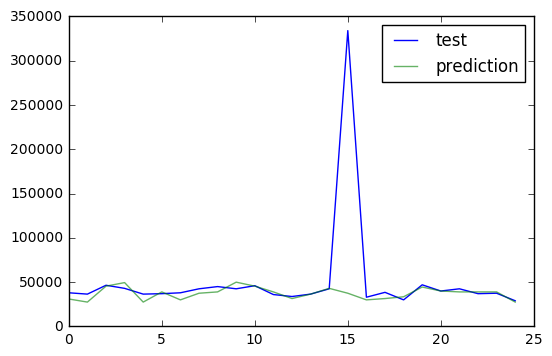

0
0.946074449958
dtree
      Distance(km)  Fuel Type  Manufacturing Year
1261       52000.0          3              2011.0
1262       53338.0          3              2011.0
1263       58387.0          3              2011.0
1264       52171.0          3              2011.0
1265       74026.0          3              2009.0
1266       31762.0          3              2015.0
1267       55940.0          3              2011.0
1270       30739.0          3              2011.0
1283       56129.0          3              2011.0
1284       49373.0          3              2010.0
1285       33295.0          3              2010.0
1287       62969.0          3              2011.0
1288       42509.0          1              2014.0
1289       59417.0          3              2010.0
1290       44686.0          3              2009.0
1291       80600.0          3              2012.0
1292       21118.0          3              2011.0
1293       52237.0          3              2009.0
1294       73469.0         

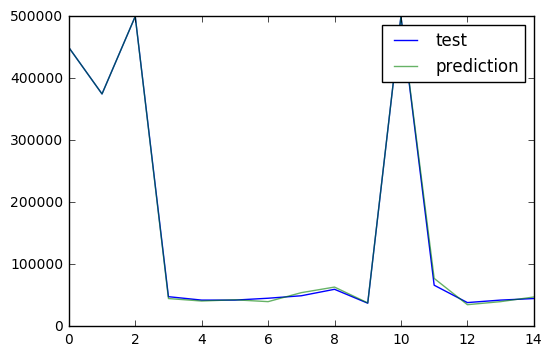

1
0.999859238444
dtree
      Distance(km)  Fuel Type  Manufacturing Year
2877       18954.0          3              2013.0
2878       70112.0          3              2014.0
2879       54000.0          3              2014.0
2880       24594.0          3              2013.0
2881       26342.0          3              2015.0
2882       12156.0          3              2015.0
2883       50219.0          3              2014.0
2884        6189.0          3              2015.0
2885       29192.0          3              2013.0
2886        9000.0          3              2016.0
2887       33382.0          3              2012.0
2888        9190.0          3              2013.0
2889       46767.0          3              2015.0
2890       31344.0          3              2015.0
2891       24062.0          3              2015.0
2892       25857.0          3              2014.0
2893       49479.0          3              2014.0
2894       26725.0          3              2014.0
2895       12000.0         

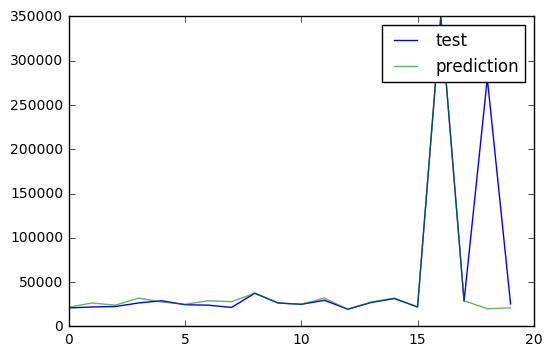

2
0.813292168724
dtree
      Distance(km)  Fuel Type  Manufacturing Year
3586       14627.0          3              2016.0
3587       34000.0          3              2014.0
3588          71.0          3              2016.0
3589        6050.0          3              2016.0
3590       37759.0          3              2013.0
3591       42463.0          3              2015.0
3611       19736.0          3              2014.0
3612       37937.0          3              2015.0
3613       31244.0          3              2016.0
3614       45466.0          3              2013.0
3615       57445.0          3              2014.0
3616       37673.0          1              2014.0
3617       34453.0          3              2014.0
3618       57745.0          3              2014.0
3619       16194.0          3              2016.0
3620       21750.0          3              2016.0
3621       34518.0          3              2016.0
3622       20139.0          3              2015.0
3623        6000.0         

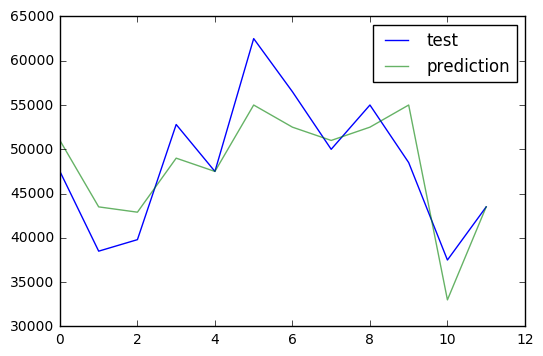

3
0.891503640088
dtree
      Distance(km)  Fuel Type  Manufacturing Year
7226      107390.0          3              2010.0
7227      106434.0          3              2009.0
7228       47739.0          3              2009.0
7229       61131.0          3              2011.0
7230       77962.0          3              2010.0
7231       52452.0          3              2011.0
7232       71479.0          3              2010.0
7233      117508.0          3              2009.0
7234      177567.0          3              2011.0
7235       95402.0          3              2010.0
7236       32693.0          3              2010.0
7237       46880.0          3              2013.0
7238       62090.0          3              2011.0
7239       41952.0          3              2010.0
7240       85767.0          3              2009.0
7241       48897.0          3              2010.0
7242        9024.0          3              2013.0
7243       36419.0          3              2013.0
7244       81428.0         

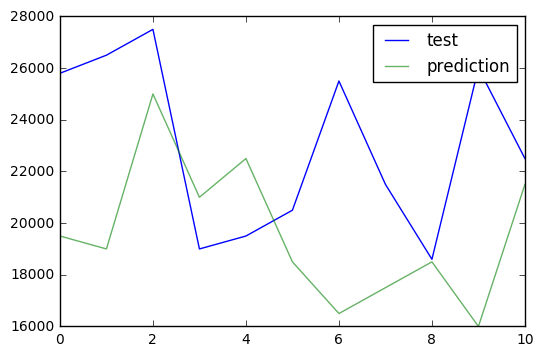

4
0.999999999835
dtree
      Distance(km)  Fuel Type  Manufacturing Year
6709       57835.0          3              2012.0
6710       97000.0          3              2014.0
6711       65505.0          3              2013.0
6712       89456.0          3              2010.0
6713        8694.0          3              2014.0
6714      113752.0          3              2013.0
6715       13000.0          3              2016.0
6716       18212.0          3              2012.0
6717       38242.0          3              2013.0
6718        8044.0          3              2015.0
6719        7600.0          3              2016.0
6720       88021.0          0              2013.0
6721       55990.0          3              2014.0
6722       78424.0          0              2013.0
6724       99704.0          3              2012.0
6725       34866.0          3              2015.0
6726       11671.0          3              2016.0
6727       46183.0          3              2014.0
6728       40236.0         

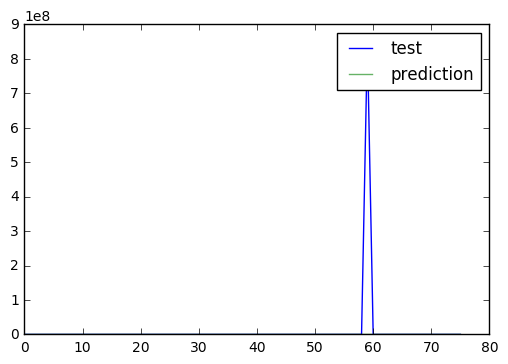

5
0.888978931324
dtree
      Distance(km)  Fuel Type  Manufacturing Year
6542       71221.0          3              2010.0
6543       18933.0          3              2013.0
6544       13973.0          3              2011.0
6545       37497.0          3              2010.0
6546       31000.0          3              2013.0
6547       50000.0          3              2013.0
6548       65418.0          3              2010.0
6549       66265.0          0              2015.0
6550       10851.0          3              2014.0
6551      213080.0          3              2012.0
6552       61261.0          3              2011.0
6553        6020.0          3              2014.0
6554       37262.0          3              2011.0
6555       34243.0          3              2013.0
6556       56206.0          3              2010.0
6557       46740.0          3              2011.0
6558       10000.0          3              2011.0
6559       52600.0          3              2014.0
6560       63263.0         

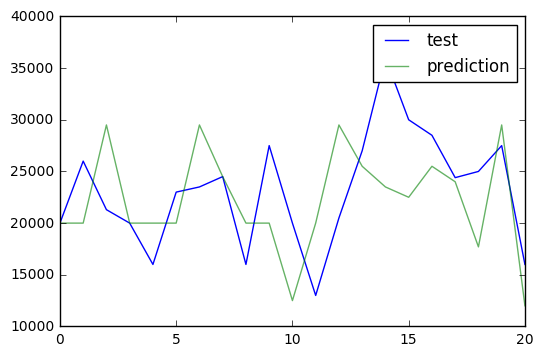

6
0.999999999103
dtree
      Distance(km)  Fuel Type  Manufacturing Year
6811       34649.0          3              2010.0
6812       44878.0          3              2017.0
6813       87908.0          3              2010.0
6814      135000.0          3              2010.0
6815       78975.0          3              2015.0
6816      100000.0          3              2012.0
6817       54448.0          3              2012.0
6818       55716.0          3              2012.0
6819       96582.0          3              2012.0
6820       27536.0          3              2016.0
6821       56843.0          3              2012.0
6822       19606.0          3              2016.0
6823       38463.0          3              2012.0
6824       60558.0          3              2015.0
6825       28345.0          3              2011.0
6826       50114.0          3              2014.0
6827       14056.0          3              2014.0
6828      128000.0          3              2010.0
6829       60574.0         

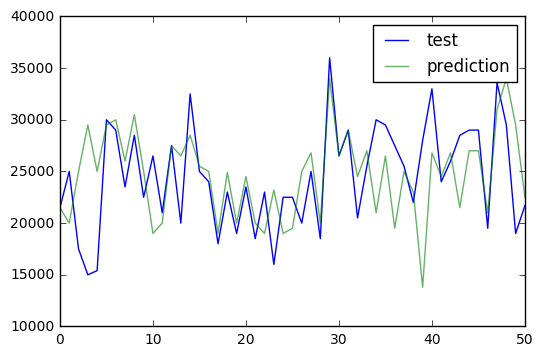

7
0.836933291441
dtree
      Distance(km)  Fuel Type  Manufacturing Year
6901       89083.0          3              2008.0
6902      200000.0          3              2004.0
6903      150823.0          3              2004.0
6904      147850.0          3              2005.0
6905      125808.0          3              2003.0
6906       90000.0          3              2006.0
6907      108105.0          3              2008.0
7348       58775.0          3              2008.0
7618       83498.0          3              2005.0
7620       39696.0          3              2005.0
7985       32913.0          3              2010.0
8160      133880.0          3              2010.0
8161       63000.0          3              2008.0
8162       50302.0          3              2009.0
8163       47967.0          3              2009.0
8164       62920.0          3              2009.0
8165       59499.0          3              2003.0
8166      103442.0          3              2005.0
8167      147851.0         

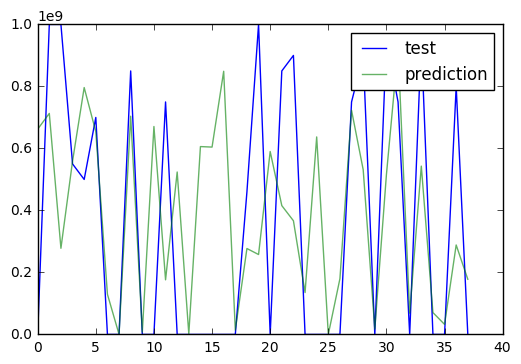

8
0.690382334693
RFR
      Distance(km)  Fuel Type  Manufacturing Year
8564       83120.0          3              2005.0
8565       74585.0          3              2009.0
8566       75342.0          3              2011.0
8567       56493.0          3              2009.0
8568       41740.0          3              2012.0
8569       42566.0          3              2011.0
8570       79348.0          3              2005.0
8571       72586.0          3              2010.0
8572      169155.0          3              2008.0
8573      119445.0          3              2005.0
8574      150000.0          3              2009.0
8575      196245.0          3              2005.0
8576      223142.0          3              2004.0
8577       25000.0          3              2005.0
8578       34564.0          3              2009.0
8579       75257.0          3              2009.0
8580       95112.0          3              2009.0
8581       65573.0          3              2010.0
8582       30616.0          3

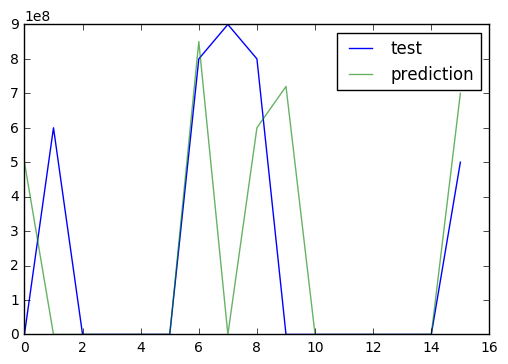

9
0.839852366024
dtree
      Distance(km)  Fuel Type  Manufacturing Year
7788       77954.0          3              2014.0
7789       42209.0          3              2014.0
7790       39000.0          3              2016.0
7791       34803.0          3              2015.0
7792       43000.0          3              2014.0
7793       30065.0          3              2015.0
7794       49373.0          3              2016.0
7795       75649.0          3              2014.0
7796       18131.0          3              2016.0
7797       22280.0          3              2014.0
7798       43036.0          3              2015.0
7799       58237.0          3              2015.0
7800       40175.0          3              2014.0
7801        4000.0          3              2016.0
7803      114460.0          3              2014.0
7818       46925.0          3              2016.0
8022      118812.0          3              2015.0
8157       22240.0          3              2014.0
8159       46087.0         

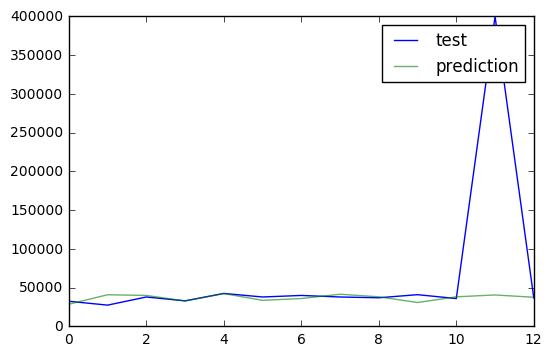

10
0.0146167914521
RFR
      Distance(km)  Fuel Type  Manufacturing Year
4924       62794.0          1              2011.0
4925      130496.0          1              2012.0
4926       71120.0          1              2013.0
4927      155413.0          1              2011.0
4928       93141.0          1              2010.0
4929       88391.0          1              2012.0
4930      185000.0          1              2011.0
4931      103749.0          1              2012.0
4932       40000.0          1              2013.0
4933       50139.0          1              2013.0
4934       86912.0          1              2009.0
4935       92891.0          1              2012.0
4936       86149.0          1              2011.0
4937       35000.0          1              2013.0
4938      121587.0          1              2010.0
4939      118551.0          1              2012.0
4940       68752.0          1              2013.0
4941       55000.0          1              2013.0
4942      104714.0         

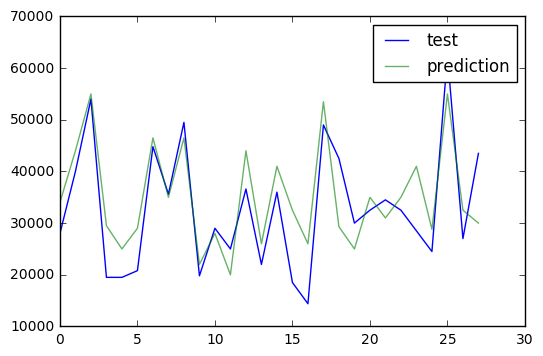

11
0.870804359667
dtree
      Distance(km)  Fuel Type  Manufacturing Year
5328       65165.0          3              2009.0
5329       55000.0          3              2014.0
5330       43000.0          3              2010.0
5331       62534.0          3              2010.0
5332       77502.0          3              2009.0
5333       57189.0          3              2010.0
5334       61996.0          3              2014.0
5335       31556.0          3              2012.0
5336       27988.0          3              2012.0
5337       77561.0          3              2010.0
5338       52165.0          3              2014.0
5339       37088.0          3              2014.0
5340       50185.0          3              2012.0
5341       44812.0          3              2015.0
5342       71017.0          3              2009.0
5343       84356.0          3              2012.0
5344      114673.0          3              2011.0
5345       61014.0          3              2011.0
5346       35288.0        

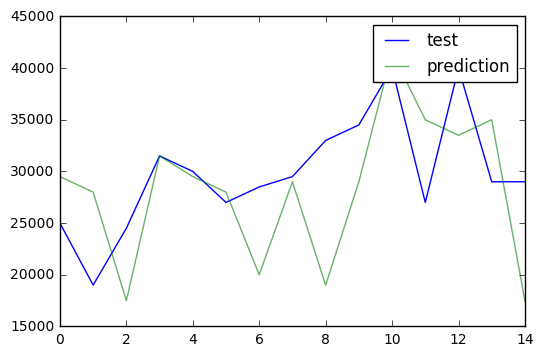

12
0.815519697759
dtree
      Distance(km)  Fuel Type  Manufacturing Year
4385       53493.0          1              2015.0
4386       51811.0          1              2013.0
4387       80000.0          1              2013.0
4388       75185.0          1              2013.0
4389       65000.0          1              2015.0
4390       26343.0          1              2014.0
4391       23813.0          1              2012.0
4392       62002.0          1              2012.0
4393       39582.0          1              2011.0
4394       35000.0          1              2014.0
4395       46747.0          1              2015.0
4396       37000.0          1              2016.0
4397       58900.0          1              2014.0
4398       60141.0          1              2012.0
4399       20029.0          1              2016.0
4400       62302.0          1              2013.0
4401       80136.0          1              2012.0
4402       34662.0          1              2014.0
4403       61230.0        

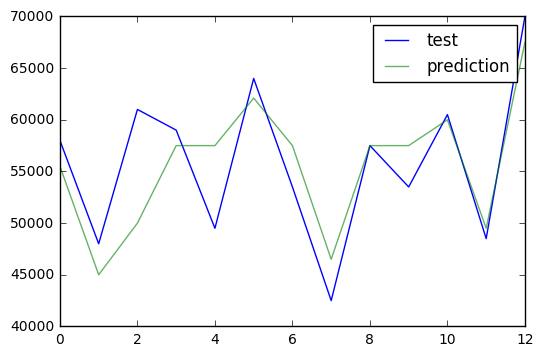

13
0.923639541471
dtree
      Distance(km)  Fuel Type  Manufacturing Year
4449       74887.0          3              2010.0
4473       43332.0          3              2013.0
4474       48127.0          3              2014.0
4475       38235.0          3              2014.0
4476       81550.0          3              2012.0
4477       65106.0          3              2013.0
4478       73773.0          3              2013.0
4479       46948.0          3              2014.0
4480       77000.0          3              2012.0
4553       28193.0          3              2013.0
4651       14944.0          3              2016.0
4653       49953.0          3              2015.0
4786       28241.0          3              2013.0
4789       41848.0          3              2010.0
4790       31827.0          3              2013.0
4791       38028.0          3              2013.0
4792       93256.0          3              2012.0
4793       36403.0          3              2015.0
4794       34855.0        

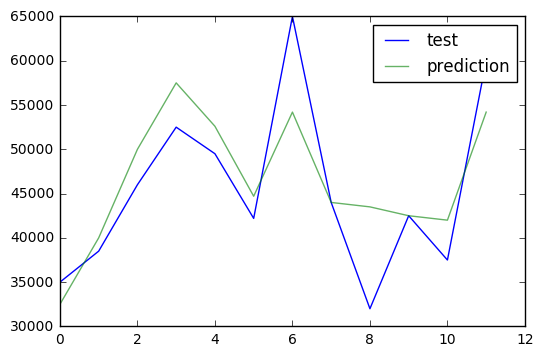

14
0.883178019226
dtree
      Distance(km)  Fuel Type  Manufacturing Year
4721       98252.0          1              2008.0
4722      157601.0          1              2012.0
4723       93474.0          1              2012.0
4724      158256.0          3              2011.0
4725       56000.0          1              2008.0
4726       37038.0          1              2014.0
4727       60995.0          1              2011.0
4728       88029.0          1              2009.0
4729      100733.0          1              2011.0
4730       82605.0          1              2009.0
4731       77563.0          1              2010.0
4732      167946.0          1              2009.0
4733       60487.0          1              2013.0
4734       33000.0          1              2015.0
4735       74889.0          1              2011.0
4736       84312.0          1              2016.0
4737       76849.0          1              2012.0
4738      125543.0          1              2011.0
4739      106411.0        

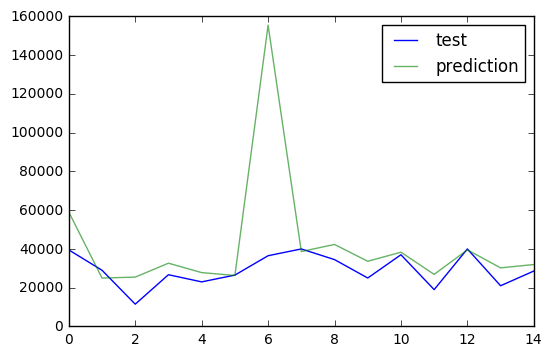

15
0.750452683326
RFR
      Distance(km)  Fuel Type  Manufacturing Year
6002      101341.0          1              2010.0
6003       91129.0          1              2012.0
6004       77881.0          1              2013.0
6005       62000.0          1              2013.0
6006      185208.0          1              2010.0
6007      105284.0          1              2012.0
6008       88452.0          1              2010.0
6009       93381.0          1              2012.0
6010       56499.0          1              2008.0
6011      125680.0          1              2013.0
6012      144080.0          1              2012.0
6013       82478.0          1              2013.0
6014       64000.0          1              2013.0
6015       57441.0          1              2014.0
6016      129418.0          1              2014.0
6017      104045.0          1              2008.0
6018       93615.0          1              2014.0
6019       74995.0          1              2009.0
6020      124798.0          

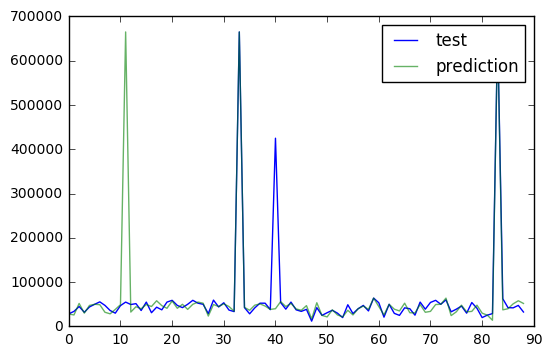

16
0.757204261329
dtree
      Distance(km)  Fuel Type  Manufacturing Year
5463       74422.0          3              2005.0
5464       46220.0          3              2014.0
5465       19795.0          3              2015.0
5492      116047.0          3              2006.0
5493       77175.0          3              2006.0
5494       31925.0          3              2015.0
5495       58086.0          3              2006.0
5496       69291.0          3              2010.0
5497       38219.0          3              2016.0
5498       84525.0          3              2011.0
5499       28548.0          3              2006.0
5500       52228.0          3              2012.0
5501        7881.0          3              2016.0
5502       59465.0          3              2009.0
5503       25080.0          3              2012.0
5504       75887.0          3              2006.0
5505       83954.0          1              2014.0
5506       99637.0          3              2008.0
5507       33752.0        

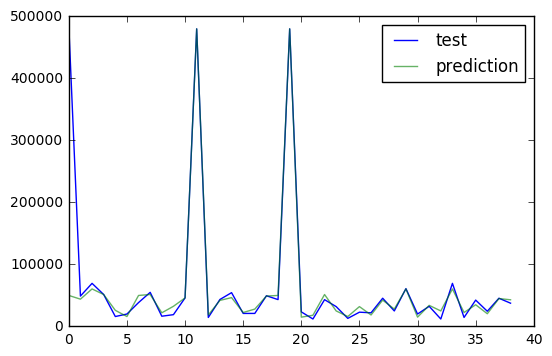

17
0.85076888952
dtree
       Distance(km)  Fuel Type  Manufacturing Year
16835       75137.0          1              2012.0
16837       62009.0          3              2012.0
16838        2023.0          3              2016.0
16857       41724.0          3              2012.0
16858        5994.0          3              2016.0
16859       60371.0          3              2011.0
16860       63633.0          3              2011.0
16861       55050.0          3              2013.0
16862       38145.0          3              2010.0
16864       76117.0          3              2011.0
16865       52486.0          3              2013.0
16866       31902.0          3              2012.0
16867       55050.0          3              2013.0
16868       48235.0          1              2013.0
16871       59121.0          3              2011.0
16872       47657.0          1              2011.0
16908       30067.0          3              2011.0
16909       33205.0          3              2011.0
16910   

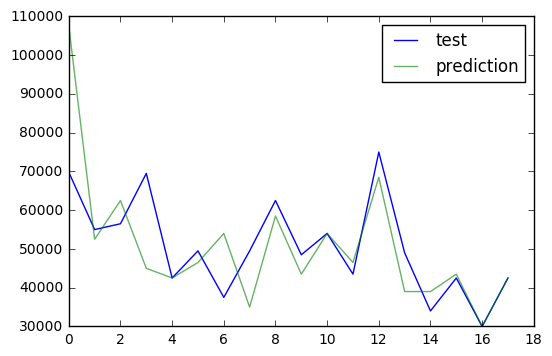

18
0.897045873565
dtree
       Distance(km)  Fuel Type  Manufacturing Year
13525       73988.0          3              2014.0
13526       73988.0          3              2014.0
13527       73988.0          3              2014.0
13528       87022.0          3              2013.0
13529       20988.0          3              2016.0
13530       87022.0          3              2013.0
13531       20988.0          3              2016.0
13532       58916.0          0              2017.0
13533       14568.0          3              2017.0
13534       46116.0          3              2014.0
13535       14568.0          3              2017.0
13536       14568.0          3              2017.0
13537       14568.0          3              2017.0
13538       20988.0          3              2016.0
13539       87022.0          3              2013.0
13540       20988.0          3              2016.0
13541       20988.0          3              2016.0
13542       20988.0          3              2016.0
13543  

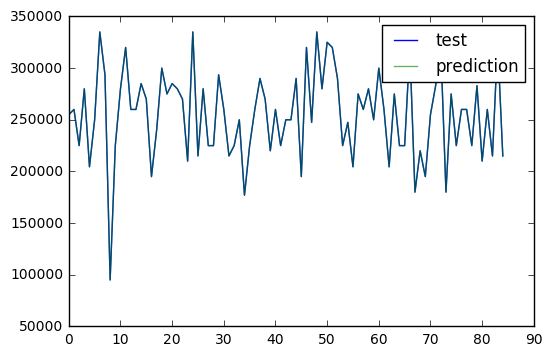

19
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
12989       68655.0          3              2005.0
12990      138482.0          3              2006.0
13018       73014.0          3              2005.0
13019       75456.0          3              2007.0
13020      153866.0          3              2007.0
13021       68655.0          3              2005.0
13022      218651.0          3              2005.0
13023      220560.0          3              2006.0
13024      218651.0          3              2005.0
13025       75456.0          3              2007.0
13026      220560.0          3              2006.0
13027       89359.0          3              2006.0
13028      153866.0          3              2007.0
13029       68655.0          3              2005.0
13030       89359.0          3              2006.0
13031       68655.0          3              2005.0
13032       96358.0          3              2006.0
13033       75456.0          3              2007.0
13034      153866.

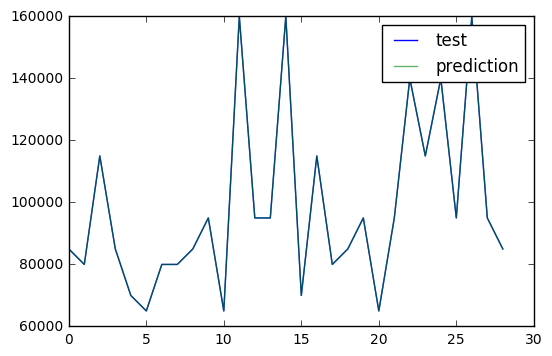

20
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
12987       47776.0          3              2011.0
12991       89505.0          3              2007.0
12992      105451.0          0              2012.0
12993      105451.0          0              2012.0
12994       57294.0          3              2010.0
12995       74748.0          3              2011.0
12996       69552.0          3              2010.0
12997       62012.0          3              2006.0
12998       47592.0          3              2009.0
12999       54904.0          3              2011.0
13000       74697.0          3              2010.0
13001      114650.0          3              2007.0
13002       62012.0          3              2006.0
13003       66830.0          3              2004.0
13004       74748.0          3              2011.0
13005       66830.0          3              2004.0
13006       74803.0          3              2009.0
13007       57294.0          3              2010.0
13008       66830.

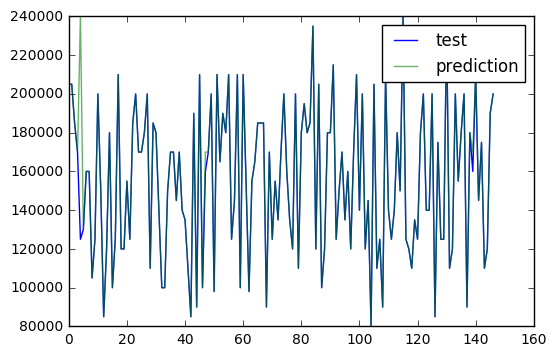

21
0.988948838757
dtree
       Distance(km)  Fuel Type  Manufacturing Year
14899      126469.0          3              2007.0
14900       73129.0          3              2004.0
14901       73129.0          3              2004.0
14902       58320.0          3              2011.0
14903      126469.0          3              2007.0
14904       73129.0          3              2004.0
14905      126469.0          3              2007.0
14906      132397.0          3              2007.0
14907       58320.0          3              2011.0
14908      132397.0          3              2007.0
14909       73129.0          3              2004.0
14910      126469.0          3              2007.0
14911       73129.0          3              2004.0
14912       58320.0          3              2011.0
14914      132397.0          3              2007.0
14915      132397.0          3              2007.0
14916       58320.0          3              2011.0
14917      132397.0          3              2007.0
14918  

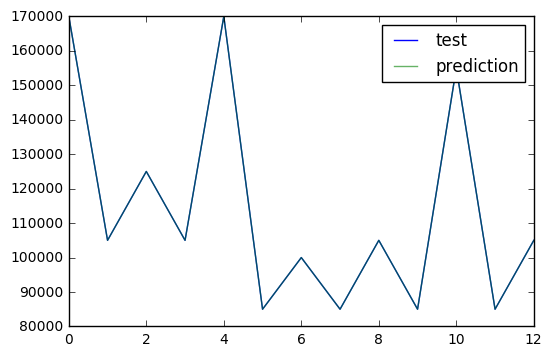

22
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
14195       79056.0          3              2011.0
14196       42335.0          3              2012.0
14197       49715.0          3              2011.0
14198       74800.0          3              2011.0
14199       79056.0          3              2011.0
14200       78000.0          3              2012.0
14201       35343.0          3              2011.0
14202       18829.0          3              2012.0
14203       41963.0          3              2010.0
14204       76087.0          3              2011.0
14205       25037.0          3              2014.0
14206       41963.0          3              2010.0
14207       76087.0          3              2011.0
14208       78000.0          3              2012.0
14209       18829.0          3              2012.0
14210       41963.0          3              2010.0
14211       76087.0          3              2011.0
14212       25037.0          3              2014.0
14213       76087.

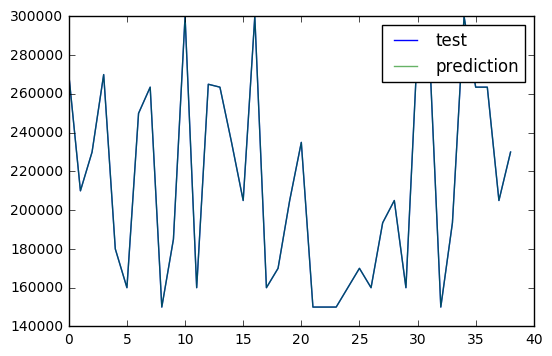

23
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
14061       31730.0          3              2012.0
14062       56245.0          3              2012.0
14063       56245.0          3              2012.0
14064       75510.0          3              2011.0
14065       71797.0          3              2011.0
14066       65042.0          3              2012.0
14067       31730.0          3              2012.0
14068       46352.0          3              2011.0
14069       31730.0          3              2012.0
14070       56245.0          3              2012.0
14071       34295.0          3              2010.0
14072       31730.0          3              2012.0
14073        9348.0          3              2018.0
14074      113081.0          3              2011.0
14075       18531.0          3              2017.0
14076       71797.0          3              2011.0
14077       75510.0          3              2011.0
14078       56245.0          3              2012.0
14079      113081.

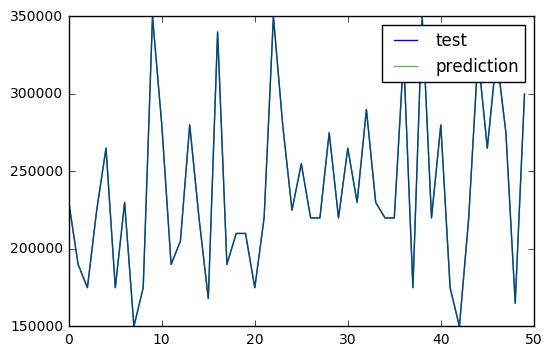

24
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
14362       25860.0          3              2016.0
14363      101328.0          3              2015.0
14364       35232.0          3              2015.0
14365      101328.0          3              2015.0
14366       35232.0          3              2015.0
14367      101328.0          3              2015.0
14368       43959.0          3              2014.0
14369       43959.0          3              2014.0
14370       43959.0          3              2014.0
14371       43959.0          3              2014.0
14372       25860.0          3              2016.0
14373      101328.0          3              2015.0
14374       35232.0          3              2015.0
14375       35232.0          3              2015.0
14393       25860.0          3              2016.0
14461       35232.0          3              2015.0
14462      101328.0          3              2015.0
14527       35232.0          3              2015.0
14530      101328.

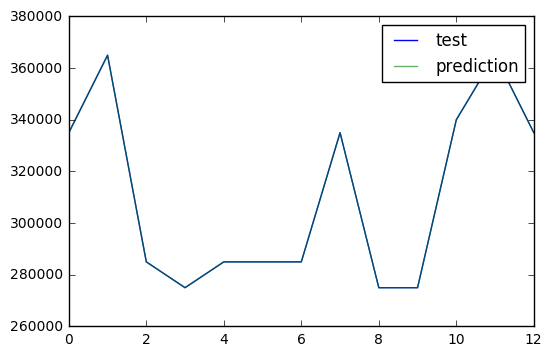

25
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
10037       44345.0          3              2011.0
10038       61437.0          3              2010.0
10039      139829.0          3              2011.0
10040      139829.0          3              2011.0
10041       44345.0          3              2011.0
10042       93733.0          0              2011.0
10043       44345.0          3              2011.0
10044       12524.0          3              2015.0
10045       61437.0          3              2010.0
10046       86211.0          0              2014.0
10047       73376.0          3              2010.0
10048       44345.0          3              2011.0
10049      101608.0          3              2014.0
10050       44345.0          3              2011.0
10051      139829.0          3              2011.0
10052       12524.0          3              2015.0
10053       93733.0          0              2011.0
10054       86211.0          0              2014.0
10055       12524.

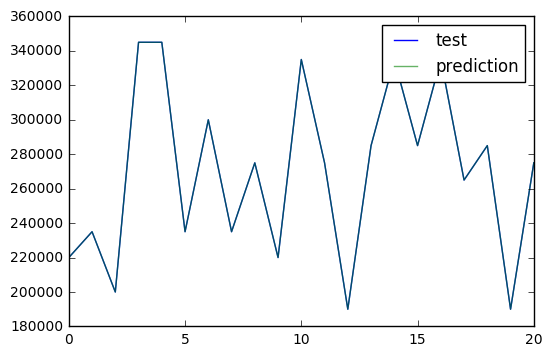

26
1.0
dtree
      Distance(km)  Fuel Type  Manufacturing Year
1987       42000.0          3              2011.0
1988       44318.0          3              2009.0
1989       69773.0          3              2009.0
1990       19978.0          3              2008.0
1991       86202.0          3              2011.0
1992       58321.0          3              2008.0
1993       50000.0          3              2009.0
1994       59111.0          3              2010.0
1995       21363.0          3              2010.0
1996       55214.0          3              2011.0
1997       58865.0          0              2008.0
1998       58368.0          3              2012.0
1999       55617.0          3              2008.0
2000       22002.0          3              2010.0
2001       67939.0          3              2011.0
2002       69919.0          3              2009.0
2003       58000.0          3              2008.0
2004       41977.0          3              2010.0
2005       57282.0          3        

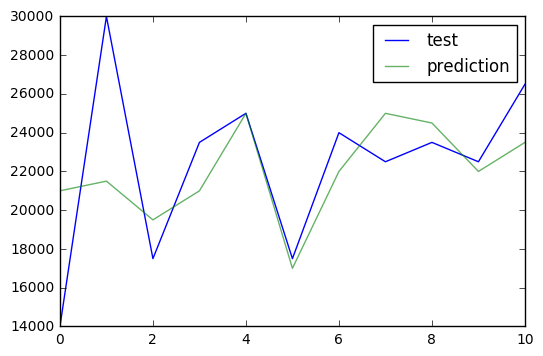

27
0.980465768013
dtree
      Distance(km)  Fuel Type  Manufacturing Year
1957       59500.0          3              2009.0
1959       75443.0          3              2010.0
1961       30600.0          3              2008.0
1962       43498.0          3              2009.0
1963       66485.0          3              2012.0
1964       72345.0          3              2009.0
1965       52310.0          3              2012.0
1966       45875.0          3              2010.0
1967       52000.0          3              2008.0
2011       48373.0          2              2012.0
2045       62295.0          3              2010.0
2047       75000.0          3              2009.0
2104       32564.0          3              2013.0
2107       55832.0          3              2011.0
2108       48240.0          3              2011.0
2109       58044.0          2              2009.0
2110       47000.0          3              2008.0
2111       58964.0          3              2009.0
2112       38786.0        

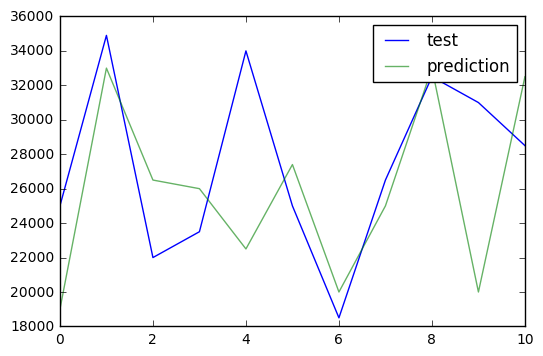

28
0.842617196633
dtree
      Distance(km)  Fuel Type  Manufacturing Year
2046       62234.0          3              2010.0
2048       53000.0          3              2013.0
2049       45000.0          3              2009.0
2050       44152.0          3              2011.0
2051       51973.0          3              2009.0
2052       48405.0          3              2010.0
2053       86810.0          3              2009.0
2054       49200.0          3              2012.0
2055       47298.0          0              2011.0
2056       30678.0          3              2014.0
2057       69014.0          3              2011.0
2058       41124.0          3              2012.0
2059       60500.0          3              2012.0
2060       52000.0          3              2010.0
2061       27165.0          3              2011.0
2062       27121.0          3              2011.0
2063       31365.0          3              2013.0
2064       54532.0          3              2012.0
2065       69756.0        

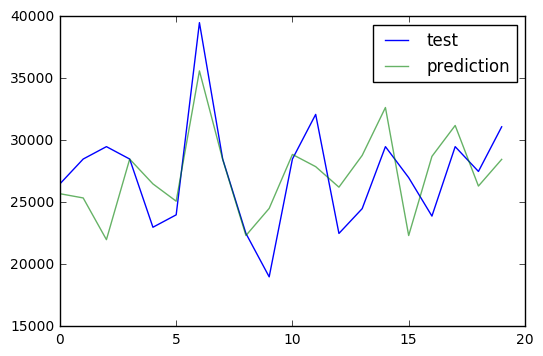

29
0.873854088954
RFR
      Distance(km)  Fuel Type  Manufacturing Year
2639       90855.0          3              2009.0
2640       60608.0          3              2010.0
2641       47669.0          3              2010.0
2664       29000.0          3              2011.0
2665       37717.0          3              2010.0
2666       45000.0          3              2010.0
2667       42065.0          3              2010.0
2668       25146.0          3              2012.0
2669       21703.0          3              2011.0
2670       60126.0          3              2009.0
2671       15294.0          3              2012.0
2672       40422.0          3              2011.0
2673       48000.0          3              2008.0
2674       30658.0          3              2011.0
2675       49305.0          3              2009.0
2676       24211.0          3              2011.0
2677       33169.0          3              2010.0
2678       56771.0          3              2010.0
2679       57815.0          

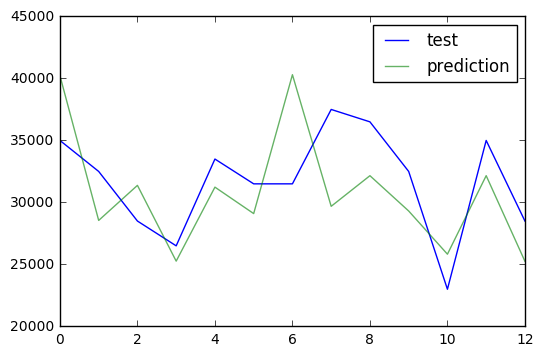

30
0.782791520188
RFR
       Distance(km)  Fuel Type  Manufacturing Year
9769        87128.0          3              2006.0
9770        95964.0          3              2010.0
9771        13503.0          3              2006.0
9772        50752.0          3              2004.0
9773        95964.0          3              2010.0
9774        13503.0          3              2006.0
9775        50752.0          3              2004.0
9798        95964.0          3              2010.0
9799        87128.0          3              2006.0
9800        13503.0          3              2006.0
9801        55900.0          3              2008.0
9802        66449.0          2              2008.0
9803        78122.0          3              2008.0
9804        87128.0          3              2006.0
9805        55900.0          3              2008.0
9806        78122.0          3              2008.0
9807        50752.0          3              2004.0
9808        78122.0          3              2008.0
9809     

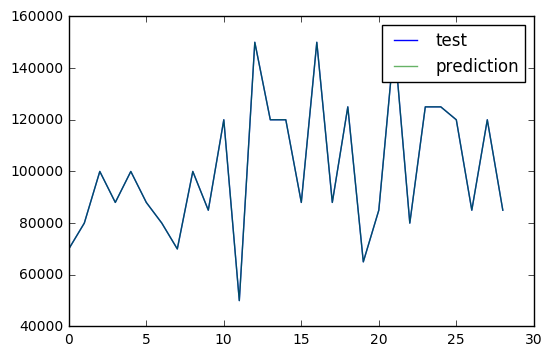

31
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
10573       62987.0          3              2004.0
10574      101041.0          3              2011.0
10575       74706.0          2              2008.0
10576       68994.0          3              2011.0
10577       41991.0          3              2014.0
10578      139469.0          3              2013.0
10579       52369.0          3              2012.0
10580       74706.0          2              2008.0
10581       68994.0          3              2011.0
10582      139469.0          3              2013.0
10583      101041.0          3              2011.0
10584      139469.0          3              2013.0
10585      139469.0          3              2013.0
10586       52369.0          3              2012.0
10587      101041.0          3              2011.0
10588       68994.0          3              2011.0
10589      101041.0          3              2011.0
10590      139469.0          3              2013.0
10591       62987.

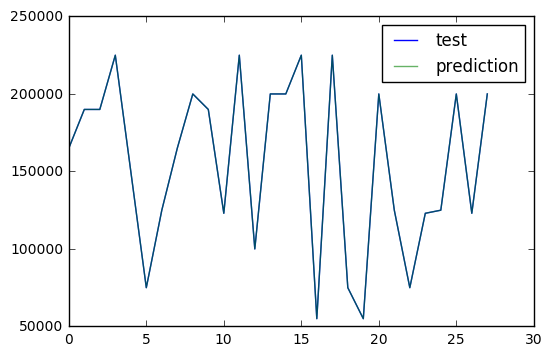

32
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
10305       80961.0          3              2009.0
10306       80559.0          2              2007.0
10307      253169.0          3              2013.0
10308      223864.0          3              2007.0
10309       80961.0          3              2009.0
10310       80559.0          2              2007.0
10311        9262.0          3              2016.0
10312       44665.0          3              2015.0
10313      223864.0          3              2007.0
10314        9262.0          3              2016.0
10315        9262.0          3              2016.0
10316      130582.0          3              2012.0
10317      253169.0          3              2013.0
10318       60439.0          3              2008.0
10319        9262.0          3              2016.0
10320       80559.0          2              2007.0
10321       80961.0          3              2009.0
10322       44665.0          3              2015.0
10323       44665.

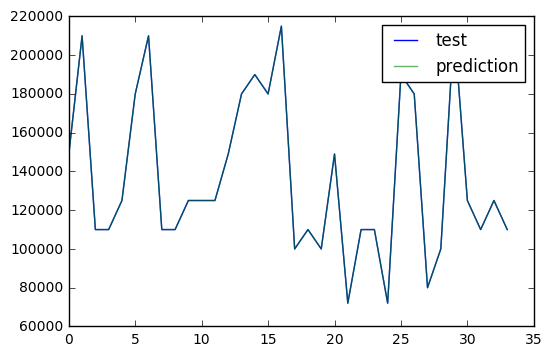

33
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
10449       75702.0          1              2016.0
10450      164961.0          1              2014.0
10451      203462.0          1              2015.0
10452       91808.0          1              2011.0
10453       91808.0          1              2011.0
10454       91808.0          1              2011.0
10455       91808.0          1              2011.0
10456      203462.0          1              2015.0
10457      164961.0          1              2014.0
10458       75702.0          1              2016.0
10459       75702.0          1              2016.0
10460       91808.0          1              2011.0
10461       91808.0          1              2011.0
10462      203462.0          1              2015.0
10463       75702.0          1              2016.0
10464      203462.0          1              2015.0
10465       91808.0          1              2011.0
10466      164961.0          1              2014.0
10467       75702.

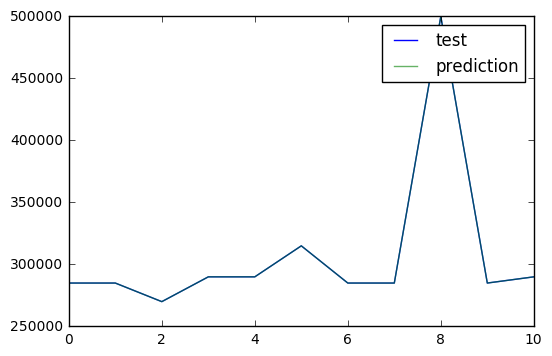

34
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
8964       124933.0          1              2010.0
8965       100091.0          1              2014.0
8966        95950.0          1              2009.0
8967        53040.0          1              2010.0
8968       124933.0          1              2010.0
8969       124933.0          1              2010.0
8970        69057.0          1              2012.0
8971        70000.0          1              2014.0
8972       185145.0          1              2009.0
8973        82342.0          1              2010.0
8974       100091.0          1              2014.0
8975        93625.0          1              2011.0
8976        82342.0          1              2010.0
8977        93625.0          1              2011.0
8978       129571.0          1              2010.0
8979        82342.0          1              2010.0
8980        70000.0          1              2014.0
8981       124933.0          1              2010.0
8982        70000.

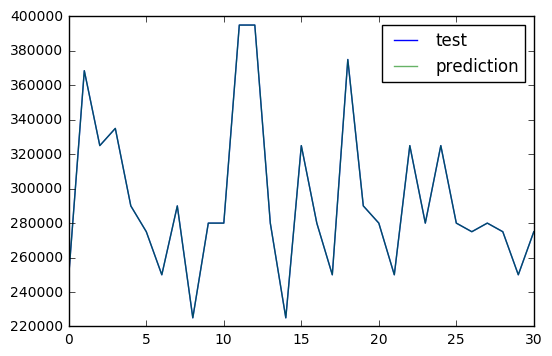

35
1.0
dtree
      Distance(km)  Fuel Type  Manufacturing Year
8962       35836.0          3              2011.0
9098       78856.0          3              2012.0
9099       78856.0          3              2012.0
9100       78856.0          3              2012.0
9101       78856.0          3              2012.0
9102       64473.0          3              2015.0
9103       78856.0          3              2012.0
9104       67302.0          3              2014.0
9105       67302.0          3              2014.0
9106       67302.0          3              2014.0
9107       67302.0          3              2014.0
9108       78856.0          3              2012.0
9109       64473.0          3              2015.0
9110       64473.0          3              2015.0
9111       64473.0          3              2015.0
9112      117589.0          3              2010.0
9113       78856.0          3              2012.0
9114       35836.0          3              2011.0
9115       35836.0          3        

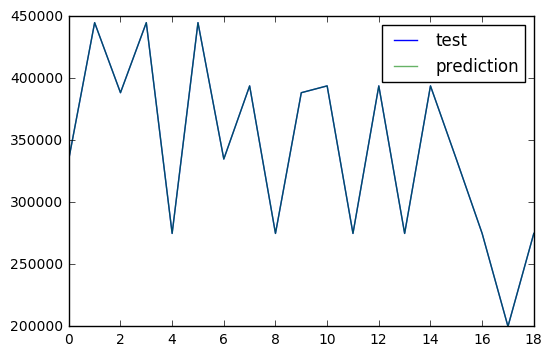

36
1.0
dtree
      Distance(km)  Fuel Type  Manufacturing Year
8762      143454.0          1              2011.0
8763      189419.0          1              2015.0
8764      168004.0          1              2007.0
8765       91998.0          1              2009.0
8766      189419.0          1              2015.0
8767      168004.0          1              2007.0
8768       91998.0          1              2009.0
8769      168004.0          1              2007.0
8770      143454.0          1              2011.0
8771      168004.0          1              2007.0
8772       91998.0          1              2009.0
8773       91998.0          1              2009.0
8774      143454.0          1              2011.0
8775       91998.0          1              2009.0
8776      143454.0          1              2011.0
8777       91998.0          1              2009.0
8778       91998.0          1              2009.0
8779       91998.0          1              2009.0
8780      189419.0          1        

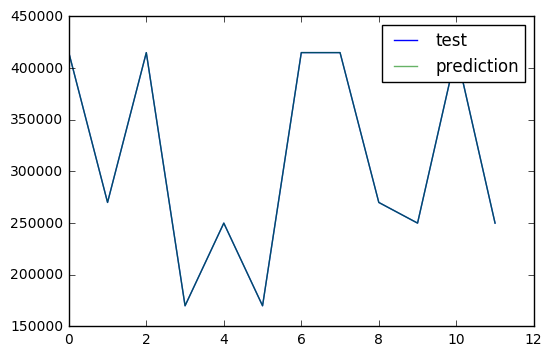

37
1.0
dtree
      Distance(km)  Fuel Type  Manufacturing Year
8697      174490.0          1              2012.0
8698      142252.0          1              2011.0
8699      140089.0          1              2010.0
8700      138801.0          1              2008.0
8701       56165.0          1              2014.0
8702       99671.0          1              2010.0
8703      142252.0          1              2011.0
8704      165130.0          1              2011.0
8705       57110.0          1              2008.0
8706      137392.0          1              2009.0
8707      113886.0          1              2016.0
8708      156256.0          1              2013.0
8709      174490.0          1              2012.0
8710      158511.0          1              2016.0
8711       73850.0          1              2012.0
8712       57600.0          1              2014.0
8713       95654.0          1              2015.0
8714       23383.0          1              2017.0
8715      156256.0          1        

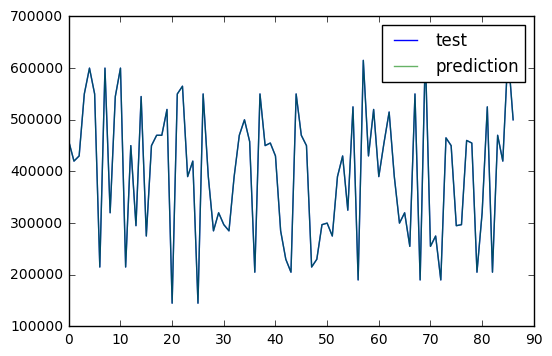

38
1.0
dtree
      Distance(km)  Fuel Type  Manufacturing Year
9230       60472.0          3              2006.0
9232       70479.0          3              2016.0
9233       52739.0          3              2011.0
9234       64320.0          3              2016.0
9235       70479.0          3              2016.0
9236       57138.0          3              2008.0
9237       37529.0          3              2015.0
9238       45286.0          3              2015.0
9239       45286.0          3              2015.0
9240       64320.0          3              2016.0
9241       52739.0          3              2011.0
9242       64320.0          3              2016.0
9243      100905.0          3              2006.0
9244       64320.0          3              2016.0
9245      128955.0          3              2010.0
9246       52739.0          3              2011.0
9247      121047.0          3              2006.0
9248      100905.0          3              2006.0
9249      100905.0          3        

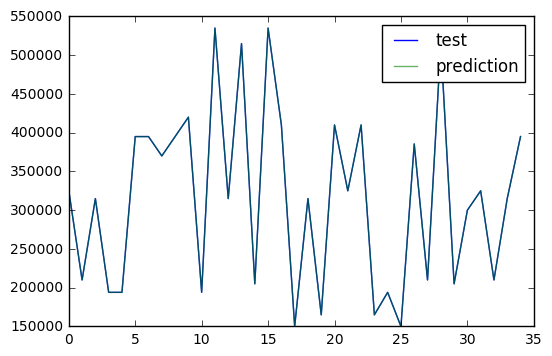

39
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
9366       186202.0          1              2009.0
9367       186202.0          1              2009.0
9368       219407.0          1              2013.0
9395       103184.0          1              2011.0
9396       171208.0          1              2012.0
9397       171208.0          1              2012.0
9398       219407.0          1              2013.0
9399       103184.0          1              2011.0
9400        77555.0          1              2015.0
9402       103184.0          1              2011.0
9403       171208.0          1              2012.0
9404       186202.0          1              2009.0
9405        97699.0          1              2011.0
9406       103184.0          1              2011.0
9407        79562.0          1              2014.0
9408       103184.0          1              2011.0
9409       186202.0          1              2009.0
9410       171208.0          1              2012.0
9411        79562.

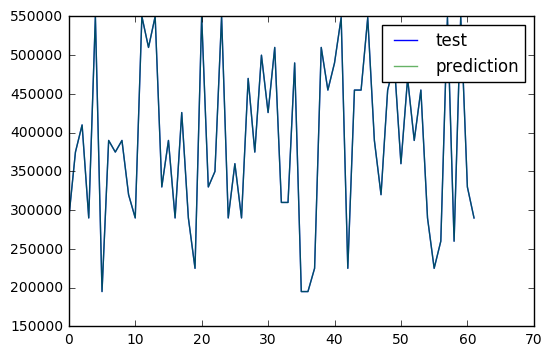

40
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
11919      141164.0          3              2011.0
11920       65996.0          3              2014.0
11921       43489.0          3              2013.0
11922       35914.0          3              2015.0
11923       65996.0          3              2014.0
11924      178786.0          3              2011.0
11925       39227.0          3              2013.0
11926       65996.0          3              2014.0
11927       43489.0          3              2013.0
11928      101566.0          3              2011.0
11929      101566.0          3              2011.0
11930       65996.0          3              2014.0
11931      141164.0          3              2011.0
11932       39227.0          3              2013.0
11933       65996.0          3              2014.0
11934       43489.0          3              2013.0
11935      101566.0          3              2011.0
11936       65996.0          3              2014.0
11937       43489.

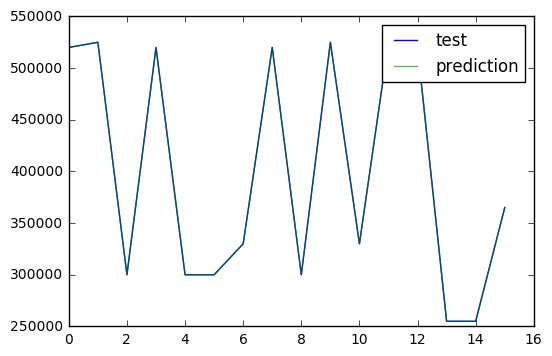

41
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
10840       82917.0          3              2009.0
11110       30850.0          3              2014.0
11111       55958.0          3              2010.0
11112       72202.0          3              2009.0
11113      121992.0          3              2004.0
11114       83710.0          0              2013.0
11115       76077.0          3              2011.0
11116       73897.0          2              2008.0
11117      121992.0          3              2004.0
11118      249580.0          3              2010.0
11119       30850.0          3              2014.0
11120      144637.0          3              2008.0
11121      144637.0          3              2008.0
11122       73897.0          2              2008.0
11123      144637.0          3              2008.0
11124       41614.0          3              2015.0
11125       84843.0          3              2009.0
11126      144637.0          3              2008.0
11127       41614.

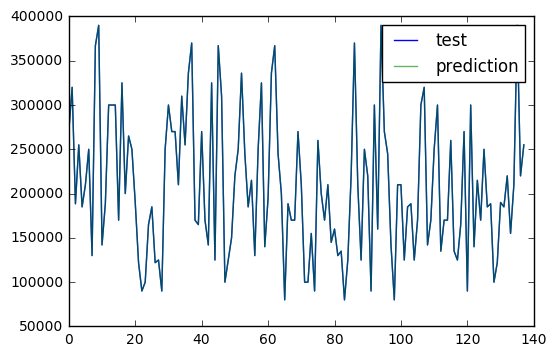

42
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
10842      109034.0          3              2010.0
10843      129494.0          3              2013.0
10844       35984.0          3              2014.0
10845       61684.0          3              2008.0
10846       47459.0          3              2015.0
10847       51489.0          3              2014.0
10848       83996.0          3              2016.0
10849       45533.0          3              2014.0
10850       91976.0          3              2013.0
10851       90675.0          3              2011.0
10852      134747.0          3              2009.0
10853       52673.0          3              2011.0
10854       86053.0          3              2013.0
10855       90675.0          3              2011.0
10856       45533.0          3              2014.0
10857       47158.0          3              2014.0
10858       86053.0          3              2013.0
10859       91976.0          3              2013.0
10860       47158.

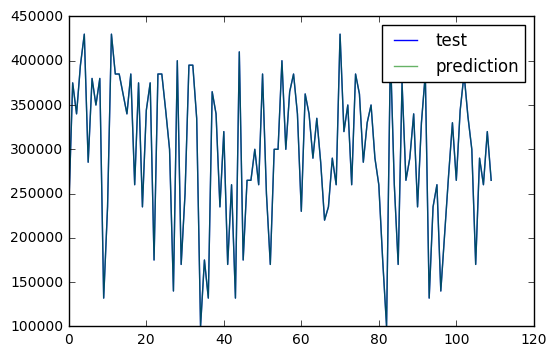

43
1.0
dtree
       Distance(km)  Fuel Type  Manufacturing Year
11378       67291.0          3              2012.0
11379       85883.0          3              2011.0
11380       48397.0          3              2009.0
11381       48397.0          3              2009.0
11382       52424.0          3              2010.0
11383      107458.0          3              2009.0
11384       67210.0          3              2011.0
11385       52598.0          3              2010.0
11386       48397.0          3              2009.0
11387       85883.0          3              2011.0
11388       48397.0          3              2009.0
11389       67210.0          3              2011.0
11390       52424.0          3              2010.0
11391       52598.0          3              2010.0
11392      107458.0          3              2009.0
11393       88512.0          3              2009.0
11394       52424.0          3              2010.0
11395       52598.0          3              2010.0
11396       52598.

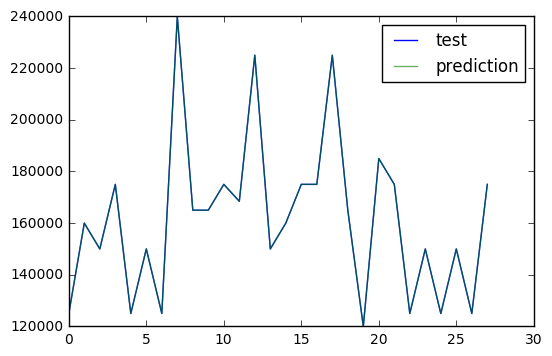

44
1.0
dtree


In [41]:
r=[]
l=[]
model=[]
for i in range(X.Model.unique().max()):
    q=X[X.iloc[:,4]==i]
    l.append(q)
    l[i]
    Y=q.iloc[:,3]
    Y.size
    l[i]=l[i].drop(['Model'],axis='columns')
    l[i]
    l[i]=l[i].drop(['Price in INR'],axis='columns')
    print(l[i])
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(l[i], Y, test_size = 0.2, random_state = 0)
    max=0
    modelbest='not known'
    
    for j in range(0,4):
        if(j==0):
            from sklearn.tree import DecisionTreeRegressor
            regressor1 = DecisionTreeRegressor(random_state = 0)
            regressor1.fit(X_train, y_train)

            R2=regressor1.score(l[i],Y)
            if(R2>max):
                max=R2
                best=regressor1
                modelbest='dtree'
        if(j==1):
            from sklearn.linear_model import LinearRegression
            regressor2 = LinearRegression()
            regressor2.fit(X_train, y_train)

            R2=regressor2.score(l[i],Y)
            if(R2>max):
                max=R2
                best=regressor2
                modelbest='MVR'
        if(j==2):
            from sklearn.ensemble import RandomForestRegressor
            regressor4 = RandomForestRegressor(n_estimators =500, random_state = 0)
            regressor4.fit(X_train, y_train)

            R2=regressor4.score(l[i],Y)
            if(R2>max):
                max=R2
                best=regressor4
                modelbest='RFR'
    r.append(best)
    model.append(modelbest)
    y_pred = r[i].predict(X_test)
    y_pred
    y_test
    plt.plot(y_test.values,label='test')
    plt.plot(y_pred,label='prediction',alpha=0.6)
    plt.legend()
    plt.show()
    R2=r[i].score(l[i],Y)
    print(i)
    print(R2)
    print(model[i])

# It was observed decision tree works best

In [42]:
print(str(1))

1


In [69]:
data = {'Distance(km)':[30000.0],'Fuel':['Petrol'],'Manufacturing Year':[2011.0],'Make':['Audi'],'Model':['City 1.5 S MT']}
df = pd.DataFrame(data)
df


,Distance(km),Fuel,Make,Manufacturing Year,Model
0,30000.0,Petrol,Audi,2011.0,City 1.5 S MT


In [70]:
print(str(1))

1


In [71]:
test=df.drop(['Make'],axis='columns')
test
location=test.iloc[:,3].values
print(location[0])
fueltype=test.iloc[:,1].values
print(fueltype[0])

City 1.5 S MT
Petrol


In [74]:
for i in range(len(labelencoder_X.classes_)):
    print(labelencoder_X.classes_[i])

CNG
Diesel
LPG
Petrol


In [72]:

a=np.where(labelencoder_X2.classes_==location[0])
print(a[0][0])

b=np.where(labelencoder_X.classes_==fueltype[0])
print(b[0][0])
test.iloc[:,1]=test.iloc[:,1].replace(fueltype[0],b[0][0])

test=test.drop(['Model'],axis='columns')
test

1
3


,Distance(km),Fuel,Manufacturing Year
0,30000.0,3,2011.0


In [54]:

y_pred = r[a[0][0]].predict(test)
y_pred

array([ 40000.])

In [55]:
y_pred = r[a[0][0]].predict(test)
y_pred

array([ 40000.])

,Distance(km),Fuel,Manufacturing Year
0,30000.0,3.0,2011.0


In [ ]:
data = {'Distance(km)':[30000.0],'Fuel':['Petrol'],'Manufacturing Year':[2011.0],'Make':['Audi'],'Model':['City 1.5 S MT']}
df = pd.DataFrame(data)
df


ValueError: could not convert string to float: 

In [48]:
import pickle

In [84]:
len(r)

45

In [49]:
strname="model_"
for i in range(len(r)):
    name=strname+str(i)
    with open('./models/'+name,'wb') as f:
        pickle.dump(r[i],f)

,Distance(km),Fuel,Manufacturing Year
0,30000.0,3.0,2011.0


In [88]:
name="model_"+t
with open('./models/'+name,'rb') as f:
    mp=pickle.load(f)

In [89]:

mp.predict(df)

array([ 40000.])